In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, mixedlm
from statsmodels.stats.anova import anova_lm

from scipy.stats import shapiro, ttest_ind, mannwhitneyu

In [3]:
base = os.path.dirname(os.getcwd())
stats_path = os.path.join(base, 'csv files', 'For_Stats.csv')

stats_df = pd.read_csv(stats_path)

In [5]:
same = stats_df[stats_df['is_same'] == 1]['judge_goe']
not_same = stats_df[stats_df['is_same'] == 0]['judge_goe']

In [6]:
print(f"All scores: {len(stats_df)}\n"
      f"Scores equal to the panel median: {len(stats_df[stats_df['goe_dist'] == 0])}\n"
      f"Scores higher or lower than the panel median: {len(stats_df[stats_df['goe_dist'] != 0])}")

All scores: 209619
Scores equal to the panel median: 124272
Scores higher or lower than the panel median: 85347


In [7]:
nx, ny = len(same), len(not_same)
print(f"Sample sizes: {nx}, {ny}")

Sample sizes: 16088, 193531


In [8]:
U_max = nx * ny
U_max

3113526728

In [9]:
sample_0 = same.sample(5000, random_state = 42)
sample_1 = not_same.sample(5000, random_state = 42)

In [10]:
stat_0, p_0 = shapiro(sample_0)
stat_1, p_1 = shapiro(sample_1)

In [11]:
print(f"Grupa is_same=0: p={p_0:.5f}, {'Rozkład Normalny' if p_0 > 0.05 else 'Nie spełnia rozkładu normalnego'}")
print(f"Grupa is_same=1: p={p_1:.5f}, {'Rozkład Normalny' if p_0 > 0.05 else 'Nie spełnia rozkładu normalnego'}")

Grupa is_same=0: p=0.00000, Nie spełnia rozkładu normalnego
Grupa is_same=1: p=0.00000, Nie spełnia rozkładu normalnego


In [12]:
U1, p = mannwhitneyu(same, not_same, method='asymptotic', alternative="two-sided")
U2 = nx * ny - U1

In [13]:
print(f"\nMann-Whitney U-Test: U1_stat={U1:.4f}, p={p}")
print(f"\nMann-Whitney U-Test: U2_stat={U2:.4f}")


Mann-Whitney U-Test: U1_stat=1706749269.0000, p=7.594038389084582e-95

Mann-Whitney U-Test: U2_stat=1406777459.0000


In [14]:
print(same.mean(), not_same.mean())
print(same.median(), not_same.median())

1.083727001491795 0.7883543204964579
2.0 1.0


<Axes: xlabel='is_same', ylabel='judge_goe'>

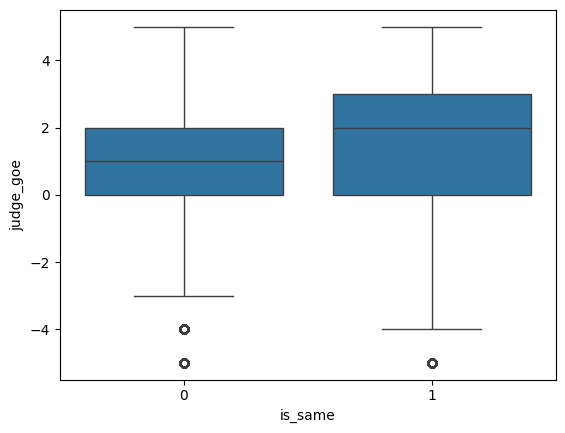

In [15]:
sns.boxplot(x='is_same', y='judge_goe', data=stats_df)

In [16]:
mi_U1 = nx * ny / 2
sigma_U1 = np.sqrt((nx * ny * (nx + ny + 1)) / 12)
Z = (U1 - mi_U1) / sigma_U1

r = Z / np.sqrt(nx + ny)

print(mi_U1, sigma_U1, Z, r)

1556763364.0 7374830.352418059 20.33753969009235 0.04442046403786992


In [17]:
U, p = mannwhitneyu(same, not_same, alternative='greater')
print(f"\nMann-Whitney U-Test: U1_stat={U:.4f}, p={p}")


Mann-Whitney U-Test: U1_stat=1706749269.0000, p=3.797019194542291e-95


In [18]:
mi_U = nx * ny / 2
sigma_U = np.sqrt((nx * ny * (nx + ny + 1)) / 12)
Z = (U - mi_U) / sigma_U

r = Z / np.sqrt(nx + ny)

print(mi_U, sigma_U, Z, r)

1556763364.0 7374830.352418059 20.33753969009235 0.04442046403786992


In [19]:
stats_df = stats_df[stats_df['base_value'] > 1.87]

In [20]:
all_country_combinations = []

for sc in stats_df['nation'].unique():
    for jc in stats_df['judge_nation'].unique():
        all_country_combinations.append((sc, jc))

len(all_country_combinations), len(set(all_country_combinations))

(2744, 2744)

In [21]:
skater_judge_com = stats_df.apply(lambda row: row['nation'] + row['judge_nation'], axis = 1)
print(len(skater_judge_com.unique()))
print(skater_judge_com.value_counts().head(43))

1819
JPNUSA    3081
JPNJPN    3041
JPNCAN    2643
USAUSA    2289
JPNKOR    2270
USAJPN    2193
USACAN    2041
JPNFRA    1770
USAKOR    1603
JPNITA    1442
CANCAN    1429
CANUSA    1271
KORJPN    1240
CANJPN    1215
USAFRA    1199
JPNFIN    1187
KORUSA    1170
KORKOR    1165
RUSRUS    1141
JPNCHN    1133
KORCAN    1127
JPNEST    1066
FRAFRA    1027
JPNGER    1027
USAITA    1010
RUSCAN    1007
RUSJPN     994
RUSUSA     972
JPNBEL     961
JPNRUS     917
JPNSUI     893
CANKOR     826
FRAJPN     802
USAEST     794
JPNAUS     783
FRAUSA     780
JPNCZE     765
CHNJPN     744
CHNCHN     725
USAFIN     724
USACHN     718
ITAITA     707
USARUS     706
Name: count, dtype: int64


In [22]:
stats_df['skater_judge'] = stats_df.apply(lambda row: row['nation'] + row['judge_nation'], axis = 1)

In [23]:
keep = set(stats_df['skater_judge'].value_counts().index[:43])
stats_trim = stats_df[stats_df['skater_judge'].isin(keep)]
stats_trim = stats_trim[stats_trim['judge_goe'] > 1.]

In [24]:
stats_trim['uid'] = stats_trim.apply(lambda row: row['element'] + row['name'], axis=1)
stats_trim

rank     competition           name nation  startnr   total   tech  \
2404       1  fc2023SEG001OF      Kao MIURA    JPN       19   91.90  51.10   
2405       1  fc2023SEG001OF      Kao MIURA    JPN       19   91.90  51.10   
2406       1  fc2023SEG001OF      Kao MIURA    JPN       19   91.90  51.10   
2407       1  fc2023SEG001OF      Kao MIURA    JPN       19   91.90  51.10   
2408       1  fc2023SEG001OF      Kao MIURA    JPN       19   91.90  51.10   
...      ...             ...            ...    ...      ...     ...    ...   
209487    14  wc2025SEG004OF  Lorine SCHILD    FRA       10  117.31  63.42   
209493    14  wc2025SEG004OF  Lorine SCHILD    FRA       10  117.31  63.42   
209495    14  wc2025SEG004OF  Lorine SCHILD    FRA       10  117.31  63.42   
209496    14  wc2025SEG004OF  Lorine SCHILD    FRA       10  117.31  63.42   
209498    14  wc2025SEG004OF  Lorine SCHILD    FRA       10  117.31  63.42   

          pcs  deductions element  ... panel_median  is_same  goe_dist  \
2404    40.80         0.0      3A  ...          3.0        0       0.0   
2405    40.80         0.0   FCSp4  ...          2.0        0       0.0   
2406    40.80         0.0   4T+3T  ...          3.0        0       1.0   
2407    40.80         0.0   CSSp4  ...          2.0        0       1.0   
2408    40.80         0.0   StSq3  ...          3.0        0       0.0   
...       ...         ...     ...  ...          ...      ...       ...   
209487  53.89         0.0  3Lz+3T  ...          2.0        1       0.0   
209493  53.89         0.0   StSq3  ...          0.0        1       2.0   
209495  53.89         0.0   ChSq1  ...          2.0        1       1.0   
209496  53.89         0.0      3S  ...          1.0        1       1.0   
209498  53.89         0.0    LSp4  ...          1.0        1       1.0   

        higher lower pt_bias s_progression  prestige  skater_judge  \
2404         0     0       0          0.58      0.57        JPNKOR   
2405         0     0       0          0.58      0.57        JPNKOR   
2406         1     0       0          0.58      0.57        JPNKOR   
2407         1     0       0          0.58      0.57        JPNKOR   
2408         0     0       0          0.58      0.57        JPNKOR   
...        ...   ...     ...           ...       ...           ...   
209487       0     0       0          0.67      0.00        FRAFRA   
209493       1     0       1          0.67      0.00        FRAFRA   
209495       1     0       1          0.67      0.00        FRAFRA   
209496       1     0       1          0.67      0.00        FRAFRA   
209498       1     0       1          0.67      0.00        FRAFRA   

                        uid  
2404            3AKao MIURA  
2405         FCSp4Kao MIURA  
2406         4T+3TKao MIURA  
2407         CSSp4Kao MIURA  
2408         StSq3Kao MIURA  
...                     ...  
209487  3Lz+3TLorine SCHILD  
209493   StSq3Lorine SCHILD  
209495   ChSq1Lorine SCHILD  
209496      3SLorine SCHILD  
209498    LSp4Lorine SCHILD  

[33120 rows x 28 columns]

In [42]:
def type_of_element(row):
    if 'St' in row['element']:
        return 'step_seq'
    elif 'Sp' in row['element']:
        return 'spin'
    elif 'Ch' in row['element']:
        return 'choreo_seq'
    else:
        return 'jump'
    
stats_trim['el_type'] = stats_trim.apply(type_of_element, axis=1)

In [53]:
quality = ols('judge_goe ~ C(is_same) + C(name) + C(judge_name)', data=stats_trim).fit()
quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              judge_goe   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     30.89
Date:                wt., 27 maj 2025   Prob (F-statistic):               0.00
Time:                        18:19:08   Log-Likelihood:                -33862.
No. Observations:               33120   AIC:                         6.836e+04
Df Residuals:                   32801   BIC:                         7.104e+04
Df Model:                         318                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       2.7351      0.055     50.000      0.000       2.628       2.842
C(is_same)[T.1]                                 0.0693      0.010      6.872      0.000       0.050       0.089
C(name)[T.Ahsun YUN]                           -0.6008      0.078     -7.664      0.000      -0.754      -0.447
C(name)[T.Aleksa RAKIC]                        -0.6482      0.095     -6.821      0.000      -0.834      -0.462
C(name)[T.Alena KOSTORNAIA]                     0.3462      0.058      5.939      0.000       0.232       0.460
C(name)[T.Alexander SAMARIN]                   -0.1624      0.064     -2.535      0.011      -0.288      -0.037
C(name)[T.Alexandra TRUSOVA]                    0.0865      0.060      1.438      0.150      -0.031       0.204
C(name)[T.Alexei KRASNOZHON]                   -0.4817      0.080     -6.018      0.000      -0.639      -0.325
C(name)[T.Alicia PINEAULT]                     -0.8391      0.150     -5.611      0.000      -1.132      -0.546
C(name)[T.Alina ZAGITOVA]                       0.6662      0.080      8.310      0.000       0.509       0.823
C(name)[T.Alison SCHUMACHER]                   -0.7304      0.113     -6.482      0.000      -0.951      -0.510
C(name)[T.Alysa LIU]                           -0.0466      0.054     -0.859      0.391      -0.153       0.060
C(name)[T.Amber GLENN]                         -0.2379      0.047     -5.110      0.000      -0.329      -0.147
C(name)[T.Andrei LAZUKIN]                      -0.3830      0.107     -3.567      0.000      -0.593      -0.173
C(name)[T.Andrei MOZALEV]                      -0.3170      0.094     -3.379      0.001      -0.501      -0.133
C(name)[T.Andrew TORGASHEV]                    -0.3599      0.058     -6.237      0.000      -0.473      -0.247
C(name)[T.Anna PEZZETTA]                        0.3104      0.228      1.359      0.174      -0.137       0.758
C(name)[T.Anna SHCHERBAKOVA]                    0.3191      0.057      5.574      0.000       0.207       0.431
C(name)[T.Anton SHULEPOV]                      -0.8218      0.148     -5.537      0.000      -1.113      -0.531
C(name)[T.Artur DANIELIAN]                     -0.5627      0.091     -6.179      0.000      -0.741      -0.384
C(name)[T.Audrey SHIN]                         -0.4446      0.060     -7.354      0.000      -0.563      -0.326
C(name)[T.Ava Marie ZIEGLER]                   -0.2764      0.070     -3.937      0.000      -0.414      -0.139
C(name)[T.Boyang JIN]                          -0.4091      0.066     -6.216      0.000      -0.538      -0.280
C(name)[T.Bradie TENNELL]                       0.1129      0.048      2.346      0.019       0.019       0.207
C(name)[T.Camden PULKINEN]                     -0.4431     

In [52]:
quality = ols('judge_goe ~ C(uid, Treatment) + C(is_same, Treatment) + C(judge_name, Treatment)', data=stats_trim).fit()
quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              judge_goe   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     9.115
Date:                wt., 27 maj 2025   Prob (F-statistic):               0.00
Time:                        18:16:36   Log-Likelihood:                -27974.
No. Observations:               33120   AIC:                         6.163e+04
Df Residuals:                   30281   BIC:                         8.550e+04
Df Model:                        2838                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      1.7089      0.592      2.885      0.004       0.548       2.870
C(uid, Treatment)[T.2A+1Eu+2SRika KIHIRA]                      0.2025      0.632      0.320      0.749      -1.036       1.441
C(uid, Treatment)[T.2A+1Eu+3FYuna AOKI]                        0.3007      0.835      0.360      0.719      -1.336       1.937
C(uid, Treatment)[T.2A+1Eu+3SElizaveta TUKTAMYSHEVA]           0.6054      0.639      0.948      0.343      -0.646       1.857
C(uid, Treatment)[T.2A+1Eu+3SHongyi CHEN]                      0.2926      0.724      0.404      0.686      -1.126       1.711
C(uid, Treatment)[T.2A+1Eu+3SKaori SAKAMOTO]                   2.1352      0.615      3.469      0.001       0.929       3.341
C(uid, Treatment)[T.2A+1Eu+3SKoshiro SHIMADA]                 -0.3603      0.841     -0.429      0.668      -2.008       1.287
C(uid, Treatment)[T.2A+1Eu+3SLiam KAPEIKIS]                    0.2143      0.683      0.314      0.754      -1.124       1.553
C(uid, Treatment)[T.2A+1Eu+3SRika KIHIRA]                      1.2031      0.610      1.974      0.048       0.008       2.398
C(uid, Treatment)[T.2A+1Eu+3SRinka WATANABE]                   0.6522      0.597      1.093      0.275      -0.518       1.822
C(uid, Treatment)[T.2A+1Eu+3SSihyeong LEE]                     0.3588      0.835      0.430      0.668      -1.279       1.996
C(uid, Treatment)[T.2A+1Eu+3SSofia SAMODUROVA]                 1.0678      0.683      1.564      0.118      -0.270       2.406
C(uid, Treatment)[T.2A+2A+SEQJuwen XU]                         0.2070      0.835      0.248      0.804      -1.430       1.844
C(uid, Treatment)[T.2A+2A+SEQMae Berenice MEITE]               0.3596      0.835      0.431      0.667      -1.277       1.997
C(uid, Treatment)[T.2A+2T+2LoRika KIHIRA]                      0.5089      0.631      0.806      0.420      -0.729       1.746
C(uid, Treatment)[T.2A+2T+2LoYelim KIM]                        0.1802      0.835      0.216      0.829      -1.456       1.817
C(uid, Treatment)[T.2A+2T+2T*Gracie GOLD]                      0.7603      0.723      1.051      0.293      -0.658       2.178
C(uid, Treatment)[T.2A+2T+2T*Kaori SAKAMOTO]                   0.1002      0.661      0.151      0.880      -1.196       1.396
C(uid, Treatment)[T.2A+2T+2TMana KAWABE]                       0.0636      0.836      0.076      0.939      -1.575       1.702
C(uid, Treatment)[T.2A+2T+2TRoman SAVOSIN]                     1.3054      0.835      1.564      0.118      -0.331       2.942
C(uid, Treatment)[T.2A+2TEunsoo LIM]                           0.2111      0.723      0.292      0.770      -1.207       1.629
C(uid, Treatment)[T.2A+2TKaren CHEN

In [21]:
quality = ols('judge_goe ~ C(uid, Treatment) + C(is_same, Treatment)', data=stats_trim).fit()
quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              judge_goe   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     8.412
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        19:36:51   Log-Likelihood:                -29047.
No. Observations:               33120   AIC:                         6.344e+04
Df Residuals:                   30448   BIC:                         8.590e+04
Df Model:                        2671                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      2.0000      0.607      3.297      0.001       0.811       3.189
C(uid, Treatment)[T.2A+1Eu+2SRika KIHIRA]                  -4.849e-12      0.649  -7.48e-12      1.000      -1.271       1.271
C(uid, Treatment)[T.2A+1Eu+3FYuna AOKI]                    -4.491e-12      0.858  -5.23e-12      1.000      -1.682       1.682
C(uid, Treatment)[T.2A+1Eu+3SElizaveta TUKTAMYSHEVA]           0.4743      0.655      0.724      0.469      -0.810       1.759
C(uid, Treatment)[T.2A+1Eu+3SHongyi CHEN]                     -0.0386      0.743     -0.052      0.959      -1.495       1.418
C(uid, Treatment)[T.2A+1Eu+3SKaori SAKAMOTO]                   1.9038      0.631      3.015      0.003       0.666       3.141
C(uid, Treatment)[T.2A+1Eu+3SKoshiro SHIMADA]              -4.464e-12      0.858   -5.2e-12      1.000      -1.682       1.682
C(uid, Treatment)[T.2A+1Eu+3SLiam KAPEIKIS]                   -0.0257      0.700     -0.037      0.971      -1.399       1.347
C(uid, Treatment)[T.2A+1Eu+3SRika KIHIRA]                      0.9279      0.625      1.484      0.138      -0.298       2.153
C(uid, Treatment)[T.2A+1Eu+3SRinka WATANABE]                   0.3860      0.612      0.630      0.528      -0.814       1.586
C(uid, Treatment)[T.2A+1Eu+3SSihyeong LEE]                 -4.507e-12      0.858  -5.25e-12      1.000      -1.682       1.682
C(uid, Treatment)[T.2A+1Eu+3SSofia SAMODUROVA]                 0.6409      0.700      0.915      0.360      -0.732       2.014
C(uid, Treatment)[T.2A+2A+SEQJuwen XU]                     -4.534e-12      0.858  -5.28e-12      1.000      -1.682       1.682
C(uid, Treatment)[T.2A+2A+SEQMae Berenice MEITE]           -4.472e-12      0.858  -5.21e-12      1.000      -1.682       1.682
C(uid, Treatment)[T.2A+2T+2LoRika KIHIRA]                      0.4175      0.649      0.644      0.520      -0.854       1.689
C(uid, Treatment)[T.2A+2T+2LoYelim KIM]                    -4.536e-12      0.858  -5.29e-12      1.000      -1.682       1.682
C(uid, Treatment)[T.2A+2T+2T*Gracie GOLD]                      0.4614      0.743      0.621      0.535      -0.995       1.918
C(uid, Treatment)[T.2A+2T+2T*Kaori SAKAMOTO]                  -0.0193      0.678     -0.028      0.977      -1.349       1.310
C(uid, Treatment)[T.2A+2T+2TMana KAWABE]                   -4.464e-12      0.858   -5.2e-12      1.000      -1.682       1.682
C(uid, Treatment)[T.2A+2T+2TRoman SAVOSIN]                     1.0000      0.858      1.166      0.244      -0.682       2.682
C(uid, Treatment)[T.2A+2TEunsoo LIM]                          -0.0386      0.743     -0.052      0.959      -1.495       1.418
C(uid, Treatment)[T.2A+2TKaren CHEN

In [45]:
quality = ols('judge_goe ~ C(uid, Treatment) + C(judge_name, Treatment) + C(el_type, Treatment)', data=stats_trim).fit()
quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              judge_goe   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     9.059
Date:                wt., 27 maj 2025   Prob (F-statistic):               0.00
Time:                        18:12:11   Log-Likelihood:                -28024.
No. Observations:               33120   AIC:                         6.172e+04
Df Residuals:                   30282   BIC:                         8.559e+04
Df Model:                        2837                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      2.4947      0.041     61.207      0.000       2.415       2.575
C(uid, Treatment)[T.2A+1Eu+2SRika KIHIRA]                      0.2053      0.633      0.324      0.746      -1.035       1.446
C(uid, Treatment)[T.2A+1Eu+3FYuna AOKI]                        0.2959      0.836      0.354      0.723      -1.343       1.935
C(uid, Treatment)[T.2A+1Eu+3SElizaveta TUKTAMYSHEVA]           0.6177      0.640      0.966      0.334      -0.636       1.871
C(uid, Treatment)[T.2A+1Eu+3SHongyi CHEN]                      0.3304      0.725      0.456      0.648      -1.090       1.751
C(uid, Treatment)[T.2A+1Eu+3SKaori SAKAMOTO]                   2.1469      0.616      3.483      0.000       0.939       3.355
C(uid, Treatment)[T.2A+1Eu+3SKoshiro SHIMADA]                 -0.3512      0.842     -0.417      0.677      -2.001       1.299
C(uid, Treatment)[T.2A+1Eu+3SLiam KAPEIKIS]                    0.2453      0.684      0.359      0.720      -1.095       1.586
C(uid, Treatment)[T.2A+1Eu+3SRika KIHIRA]                      1.2124      0.610      1.986      0.047       0.016       2.409
C(uid, Treatment)[T.2A+1Eu+3SRinka WATANABE]                   0.6645      0.598      1.111      0.266      -0.507       1.836
C(uid, Treatment)[T.2A+1Eu+3SSihyeong LEE]                     0.3598      0.837      0.430      0.667      -1.280       1.999
C(uid, Treatment)[T.2A+1Eu+3SSofia SAMODUROVA]                 1.0860      0.684      1.589      0.112      -0.254       2.426
C(uid, Treatment)[T.2A+2A+SEQJuwen XU]                         0.1927      0.836      0.230      0.818      -1.446       1.832
C(uid, Treatment)[T.2A+2A+SEQMae Berenice MEITE]               0.3402      0.836      0.407      0.684      -1.299       1.980
C(uid, Treatment)[T.2A+2T+2LoRika KIHIRA]                      0.5166      0.632      0.817      0.414      -0.723       1.756
C(uid, Treatment)[T.2A+2T+2LoYelim KIM]                        0.1698      0.836      0.203      0.839      -1.469       1.809
C(uid, Treatment)[T.2A+2T+2T*Gracie GOLD]                      0.7944      0.725      1.096      0.273      -0.626       2.214
C(uid, Treatment)[T.2A+2T+2T*Kaori SAKAMOTO]                   0.1254      0.662      0.189      0.850      -1.173       1.424
C(uid, Treatment)[T.2A+2T+2TMana KAWABE]                       0.0667      0.837      0.080      0.936      -1.575       1.708
C(uid, Treatment)[T.2A+2T+2TRoman SAVOSIN]                     1.2929      0.836      1.546      0.122      -0.346       2.932
C(uid, Treatment)[T.2A+2TEunsoo LIM]                           0.2443      0.725      0.337      0.736      -1.176       1.664
C(uid, Treatment)[T.2A+2TKaren CHEN

In [49]:
quality.params[quality.params.index.str.contains('MORITZ')] + quality.params.Intercept

C(judge_name, Treatment)[T.Patricia MORITZ]    3.192977
dtype: float64

In [23]:
model = smf.ols("judge_goe ~ is_same + prestige + s_progression + panel_median", data=stats_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              judge_goe   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 4.212e+05
Date:                wt., 27 maj 2025   Prob (F-statistic):               0.00
Time:                        13:18:45   Log-Likelihood:            -2.3252e+05
No. Observations:              204687   AIC:                         4.650e+05
Df Residuals:                  204682   BIC:                         4.651e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0198      0.006     -3.363

In [24]:
model = mixedlm("judge_goe ~ 1", data=stats_trim, groups=stats_trim["is_same"])
result = model.fit()
print(result.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: judge_goe  
No. Observations: 33120   Method:             REML       
No. Groups:       2       Scale:              0.5880     
Min. group size:  7069    Log-Likelihood:     -38205.9975
Max. group size:  26051   Converged:          Yes        
Mean group size:  16560.0                                
----------------------------------------------------------
           Coef.  Std.Err.     z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  2.700     0.018  154.192  0.000   2.666   2.734
Group Var  0.001                                          



c:\Users\siedl\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\siedl\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\siedl\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\siedl\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [33]:
model = mixedlm("judge_goe ~ is_same + prestige + s_progression + panel_median", data=stats_trim, groups=stats_trim["judge_name"]).fit()
print(model.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: judge_goe  
No. Observations: 33120   Method:             REML       
No. Groups:       168     Scale:              0.3135     
Min. group size:  17      Log-Likelihood:     -28017.3511
Max. group size:  1047    Converged:          Yes        
Mean group size:  197.1                                  
---------------------------------------------------------
               Coef. Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      1.064    0.020  52.851 0.000  1.024  1.103
is_same        0.087    0.008  10.920 0.000  0.071  0.103
prestige       0.137    0.012  11.084 0.000  0.113  0.161
s_progression  0.158    0.030   5.217 0.000  0.099  0.217
panel_median   0.603    0.004 149.960 0.000  0.595  0.611
Group Var      0.027    0.006                            

